# Вероятностные модели

Вероятностные модели широко используются для управления кредитным риском розничных заемщиков. Среди них **аппликативные модели** ориентированы на предварительную оценку кредитного риска заемщика на этапе его обращения в банк за кредитом и принятия решения по выдаче ссуды. На основе имеющегося у банка практического опыта учет характеристик заемщиков и финансовых инструментов в рамках классов однородных кредитных требований к розничным заемщикам может осуществляться посредством последовательного применения аппликативных моделей, используемых на этапе обращения заемщика в банк, и **поведенческих моделей**, позволяющих учитывать поведение заемщика в процессе обслуживания ссуды.

При этом для оценки вероятности дефолта заемщика банк использует всю имеющуюся информацию о заемщике. В связи с этим при появлении у заемщиков значимых поведенческих факторов риска или иной существенной информации о заемщике банку рекомендуется использовать поведенческую модель оценки заемщика в процессе обслуживания ссуды. Вероятность дефолта, полученная с помощью как поведенческих, так и аппликативных моделей, калибруется на долгосрочную среднегодовую величину фактической частоты дефолтов.

*(с) Консультант плюс*

## Аппликативные модели
 играют важную роль на начальном этапе взаимодействия банка с заемщиком. Эти модели помогают принять решение о выдаче кредита, используя различные факторы и скоринговые методы. В некоторых случаях аппликативные модели могут быть реализованы без вероятностных оценок, опираясь исключительно на скоринг, который представляет собой линейную комбинацию преобразованных факторов модели. Главная задача таких моделей - ранжирование потенциальных клиентов, то есть определение их места в очереди с учетом риска.

Банк устанавливает **пороговый уровень (threshold)**, и клиенты, которые получают оценку ниже этого уровня, получают кредит, в то время как те, кто превышает порог, получают отказ.  


**Логистическая регрессия**

+ С выполнением предварительной обработки факторов (то есть трансформации каждого отдельного признака) и при правильной настройке регуляризации, она может показать результаты, близкие к более сложным методам.

+ Модель менее подвержена переобучению.

+ Обладает ясной интерпретацией результатов.

+ Легко документировать и объяснять её работу регуляторам.

## Поведенческие модели
используются для прогнозирования поведения заемщика **после выдачи** кредита. Эти модели могут быть калиброваны с использованием двух основных подходов: TTC (Through the Cycle) и PIT (Point in Time).

TTC рассчитывается как средний годовой уровень дефолтов за 5-7 лет, что позволяет получить более стабильную оценку для расчета резервов и капитала.

 PIT, с другой стороны, отражает текущую ситуацию и рассчитывается как среднегодовой уровень дефолтов за последние полгода или год.

Выбор подходящей калибровки зависит от цели расчета. Для оценки текущей стоимости портфеля и других актуальных показателей используется PIT, в то время как TTC применяется для более долгосрочного планирования, такого как расчет резервов и капитала. Поведенческие модели позволяют банку прогнозировать поведение заемщиков и принимать информированные решения, основываясь на конкретных горизонтах и уровнях дефолтов.


## Коэффициент Джини, AUC и другие метрики качества моделей

После разработки модели важно оценить ее качество, особенно в контексте способности к ранжированию клиентов, так как этот аспект наиболее важен для принятия решений о выдачи клиенту займов.

Среди основных метрик выделяются:

*  **ROC AUC**: это вероятность того, что дефолтный заемщик имеет уровень вероятностного дефолта (PD), превышающий таковой у недефолтного заемщика;

*  **Коэффициент Джини**: позволяет оценить эффективность модели в ранжировании заемщиков вне зависимости от конкретных порогов отсечения.

Следует отметить, что ROC AUC и коэффициент Джини являются общепринятыми метриками качества в банковской сфере и используются для сравнения различных моделей.

Коэффициент Джини демонстрирует корреляционные свойства:

*   0: отсутствие связи между целевой переменной и PD;
*   1: все дефолтеры имеют PD выше, чем добросовестные заемщики;
*   -1: ранжирование заемщиков происходит в обратном порядке.

Таким образом, значения Джини ниже 30% указывают на низкое качество модели, в то время как значения выше 60% свидетельствуют о высоком качестве.

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='afmhot', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('white')
    plt.tight_layout()
    plt.show()

Прежде, чем начать поиск оптимальных гиперпараметров необходимо определить функции для оценки модели

**Scorer functions**

In [ ]:
from sklearn.metrics import roc_curve

def gini(model, x_train, y_train):
    y_prob = model.predict_proba(x_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_prob)
    gini = 2 * (tpr - fpr).mean() - 1
    return gini

In [ ]:
def f1_metric(model, X_train, y_train):
    return f1_score(y_train, model.predict(X_train), average='binary')

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall', 'F1-score','AUC'], #'Accuracy','Precision','Recall',
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

## Оптимизация гиперпараметров



Оптимизируем все гиперпараметры для классификатора, выполняя поиск по указанной сетке гиперпараметров. Используем GridSearchCV и перекрестную проверку (StratifiedKFold) для оценки различных комбинаций гиперпараметров и выбираем
комбинацию с наивысшей оценкой gini.

Функция возвращает лучший классификатор с оптимальными гиперпараметрами.

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    # Создаем объект кросс-валидации, который обеспечивает сохранение пропорций классов в каждой части
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Создаем объект для брутфорсного поиска по заданной сетке параметров, используя кросс-валидацию, и оценивает различные комбинации на основе метрики F1
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=1)

    # Обучаем GridSearchCV на тренировочных данных
    clf_grid.fit(X_train, y_train)

    print("Best hyperparameters:\n", clf_grid.best_params_)

    return clf_grid.best_estimator_

## Ранжирование признаков по их вкладу в предсказания (feature importance)

In [ ]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    '''
    Функция определяет важность признаков на основе уменьшения производительности модели при исключении каждого признака по отдельности
    '''
    importances = []
    # Клонирование позволяет использовать один и тот же объект, обучая его многократно, избегая переобучения.
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(X_train, y_train)

    # Используем кросс-валидацию для оценки исходной модели перед началом измерения важности
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    for col in X_train.columns:
        '''
            Для каждого признака:
            Клонируется модель.
            Обучается с исключенным признаком.
            Вычисляется оценка gini для модели без этого признака.
            Разница между исходной оценкой и новой оценкой (после исключения признака) добавляется в список importances.
        '''
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=gini).mean()
        importances.append(benchmark_score - drop_column_score)

    # На выходе получается DataFrame с признаками и их важностью, отсортированный по убыванию значения важности.
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

**График**

In [ ]:
def drop_column_importance_plot(model, X_train, y_train):
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    df_drop_column.columns = ['feature', 'feature importance']

    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='feature importance', y='feature', orient='h', color=(0.8, 0.9, 0.8, 0.8))
    plt.title('feature importance', fontsize=20)
    plt.show()

# Моделирование

## Логистическая регрессия

 предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице



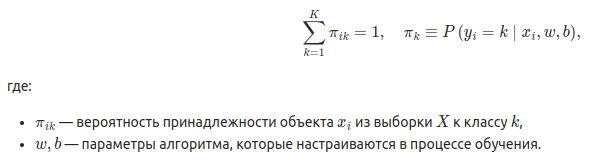

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

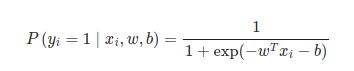

Параметры *w* и *b* находятся как решения оптимизационной задачи, например, с *L2*-регуляризацией:

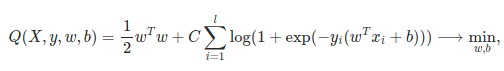

или *L1*-регуляризацией:

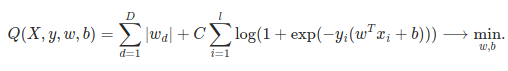

*C* — гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

**Определение весов классов**

Создадим список весов для классов. Это подойдет для нашего случая, когда классы несбалансированы (один класс сильно преобладает)

np.linspace(0.001, 0.5, 20) генерирует 20 значений от 0.001 до 0.5 и создает веса для класса 0 (например, положительный класс) и 1 (отрицательный класс).

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

### Настройка гиперпараметров и обучение

Настроем сетку гиперпараметров для модели логистической регрессии, где перечислены варианты решений(solver), типов штрафов (penalty), коэффициента регуляризации (C), а также весов классов.

In [ ]:
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
               'penalty':['none'],
               'class_weight':class_weights},

              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10), #  генерирует 10 значений для C с масштабом между 10^-5 и 10^5.
               'class_weight':class_weights},

              {'solver':['liblinear', 'saga'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), #  генерирует значения для l1_ratio, которые используются в elastic net регуляризации.
               'class_weight':class_weights}]

**Коэффициент регуляризации**

Регуляризация — техника, используемая для предотвращения переобучения модели при обучении с использованием регуляризирующих коэффициентов, таких как L1 (Lasso) или L2 (Ridge). В логиcтической регрессии это помогает:

*   Уменьшить сложность модели, исключая незначимые признаки.
*   Предотвратить переобучение на обучающей выборке, что позволяет модели лучше обобщать на новых данных.

Необходимо исследовать различные значения этого коэффициента и найти оптимальное, которое обеспечит наилучшее качество модели

### Оценка производительности модели логистической регрессии

In [ ]:
#Базовая модель с макс. количеством итераций 1000
logreg = LogisticRegression(max_iter=1000)

# Сохраняем модель с оптимальными гиперпараметрами
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 5}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    254686
           1       0.52      0.07      0.13     62138

    accuracy                           0.80    316824
   macro avg       0.67      0.53      0.51    316824
weighted avg       0.76      0.80      0.74    316824


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63671
           1       0.52      0.08      0.13     15535

    accuracy                           0.81     79206
   macro avg       0.67      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206



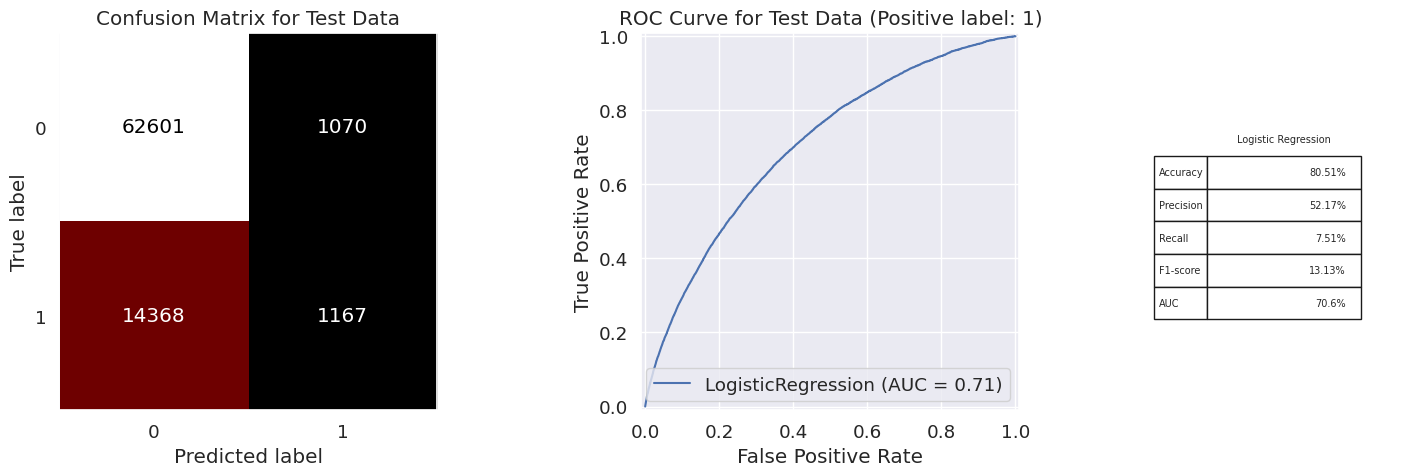

In [ ]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

**Ранжирование по значимости признаков**

Вызываем функцию drop_column_importance и строим график значимости признаков на основе ярко выраженной разницы метрики

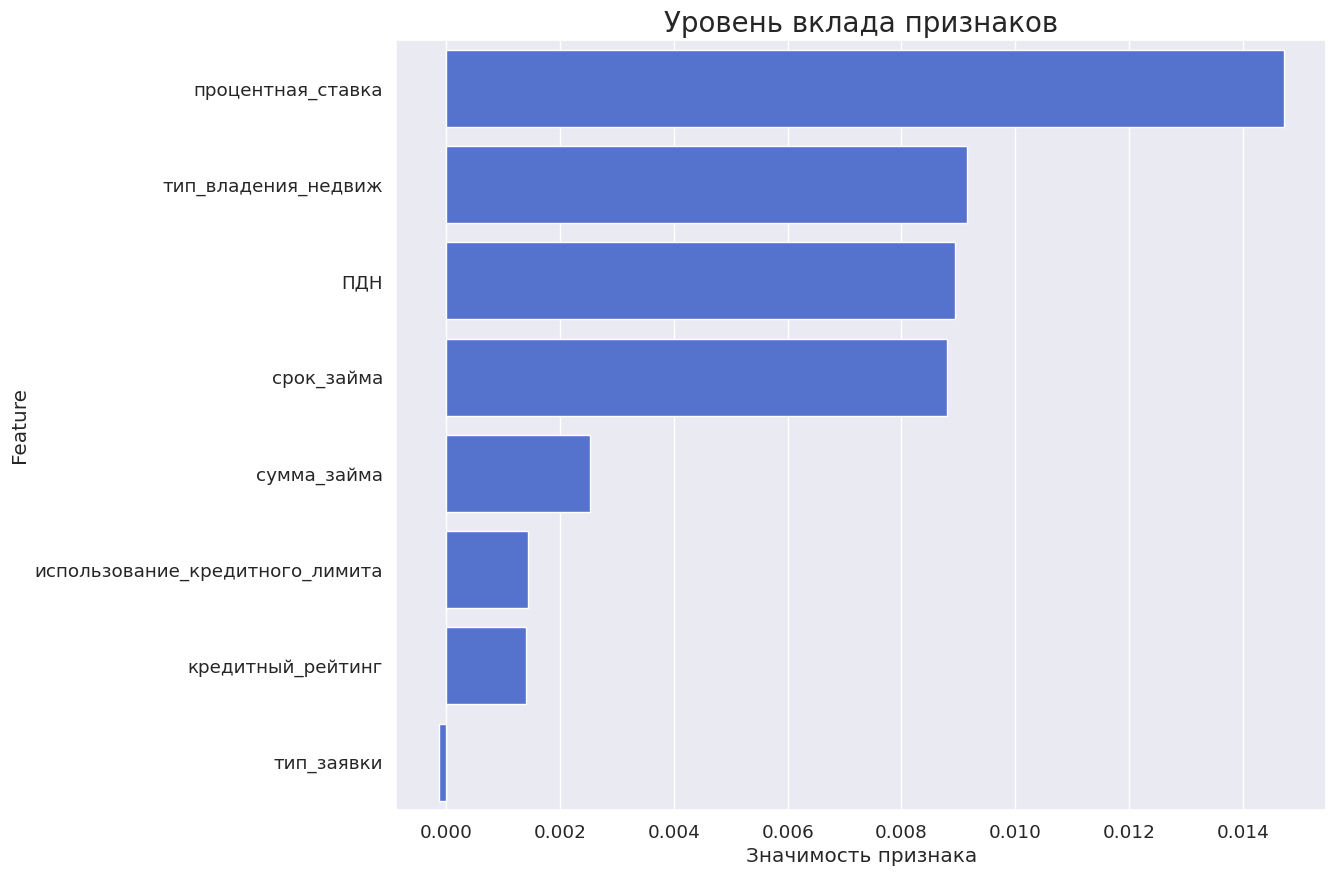

In [ ]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

**Сокращение набора данных**

Обучение заняло 6 часов, поэтому мы решили сократить набор данных

In [ ]:
x_encoded_without_nonimp = X_encoded.drop('тип_заявки', axis=1)

In [ ]:
X_encoded = pd.concat([x_encoded_without_nonimp, y_encoded], axis=1)

In [ ]:
# Случайная выборка 10 000 экземпляров
reduced_data = X_encoded.sample(n=10000, random_state=42)
y = reduced_data["статус_займа"]
reduced_data = reduced_data.drop("статус_займа",  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 7)
y_train shape: (8000,)

X_test shape: (2000, 7)
y_test shape: (2000,)


In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg_opt_final = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters:
 {'C': 100000.0, 'class_weight': {0: 0.4474736842105263, 1: 0.5525263157894738}, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.57828856 -0.57829018
 -0.5781412 ]
  warnings.warn(



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6432
           1       0.47      0.12      0.19      1568

    accuracy                           0.80      8000
   macro avg       0.64      0.54      0.54      8000
weighted avg       0.75      0.80      0.75      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1608
           1       0.53      0.17      0.25       392

    accuracy                           0.81      2000
   macro avg       0.68      0.57      0.57      2000
weighted avg       0.77      0.81      0.77      2000



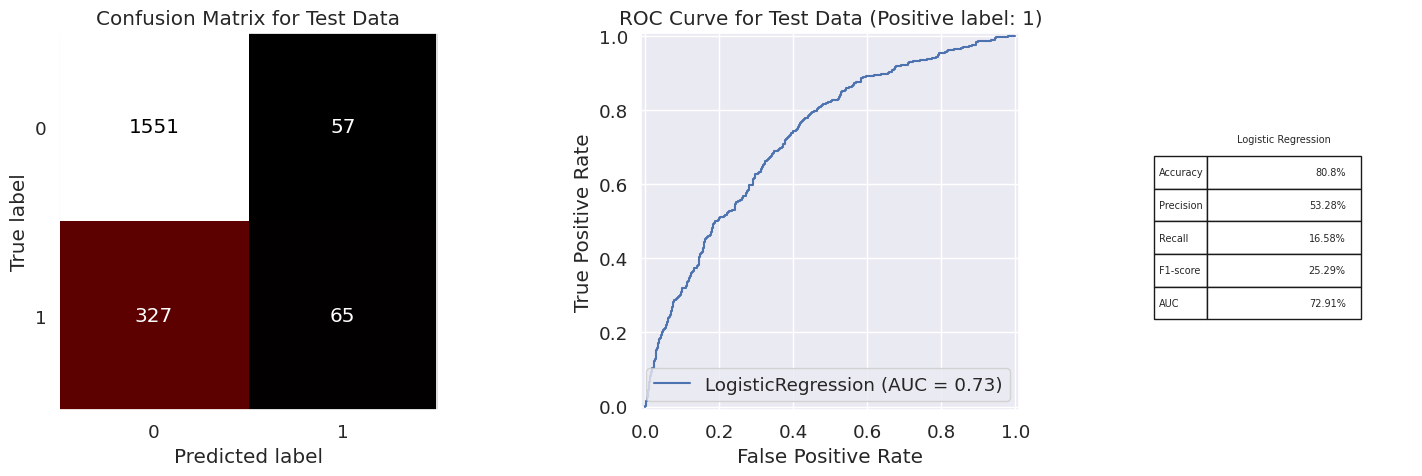

In [ ]:
model_evaluation(logreg_opt_final, X_train, X_test, y_train, y_test, 'Logistic Regression')

Записывается итоговая производительность классификатора логистической регрессии, рассчитывается с использованием функции metrics_calculator, которая выводит метрики производительности модели

In [ ]:
logreg_result = metrics_calculator(logreg_opt_final, X_test, y_test, 'Logistic Regression')

## **Gradient Boosting**

метод машинного обучения, использующий ансамбль слабых моделей, обычно деревьев решений, для задач классификации и регрессии. Он последовательно создает модели, каждая из которых исправляет ошибки предыдущей. Алгоритм обучает деревья, чтобы они соответствовали отрицательному градиенту функции потерь, а окончательный прогноз получается путем объединения результатов всех деревьев.

### Настройка гиперпараметров и обучение

Неправильная настройка гиперпараметров может привести к недообучению или переобучению и повлиять на способность модели обобщать невидимые данные.



*   **n_estimators**: количество деревьев в ансамбле.
*   **learning_rate**: скорость обучения уменьшает вклад каждого дерева на коэффициент learning_rate. Это параметр для управления величиной обновления, и значение должно быть установлено ниже для большого количества деревьев.
*   **max_depth**: максимальная глубина отдельных деревьев решений. Чем глубже дерево, тем больше у него разделений и тем сложнее становится модель.
*   **min_samples_split**: минимальное количество образцов, необходимое для разделения внутреннего узла.
*   **min_samples_leaf**: минимальное количество образцов, необходимое для листового узла.
*   **max_features**: количество признаков, которые следует учитывать при поиске наилучшего разделения.
*   **subsample**: доля образцов, которая будет использоваться для подгонки отдельных базовых учеников.
*   **loss**: функция потерь, которая должна быть оптимизирована. Функция потерь по умолчанию — «отклонение», которая относится к логистической регрессии для бинарной классификации и полиномиальному отклонению для задач многоклассовой классификации.
*   **критерий**: Функция для измерения качества разделения. Поддерживаемые критерии — «friedman_mse» для среднеквадратической ошибки, которая используется для задач регрессии, и «энтропия».

In [ ]:
gbc_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'learning_rate': [0.3, 0.4, 0.5]
}

In [ ]:
gbc = GradientBoostingClassifier(max_features=None, loss='log_loss', criterion='friedman_mse',
                                 learning_rate=0.4, max_depth=5, n_estimators=100, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best hyperparameters:
 {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6432
           1       0.91      0.19      0.32      1568

    accuracy                           0.84      8000
   macro avg       0.87      0.59      0.61      8000
weighted avg       0.85      0.84      0.79      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1608
           1       0.45      0.09      0.15       392

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.52      2000
weighted avg       0.74      0.80      0.74      2000



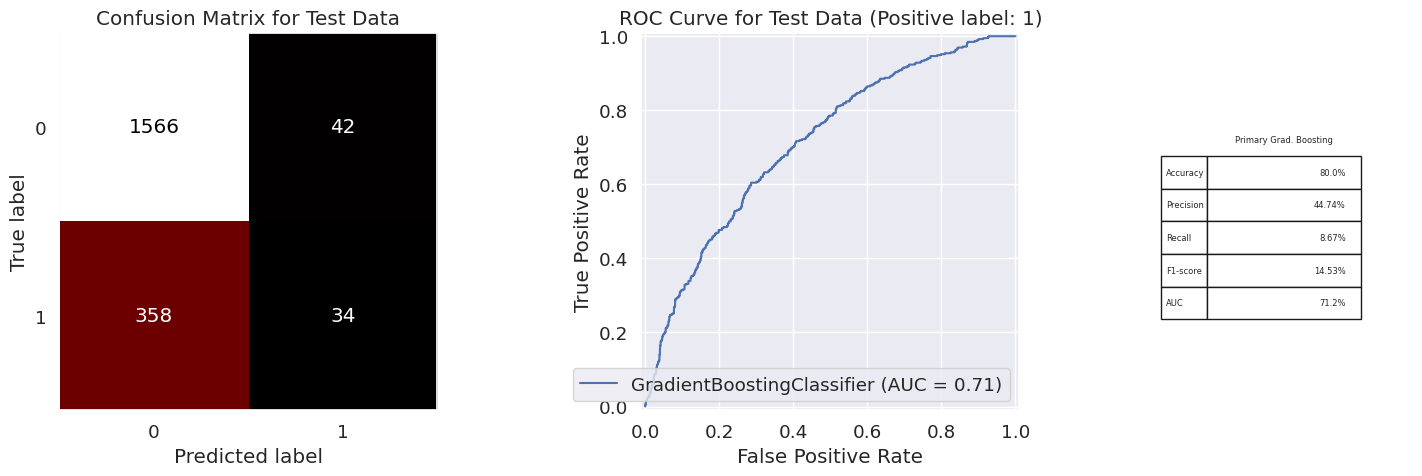

In [ ]:
model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

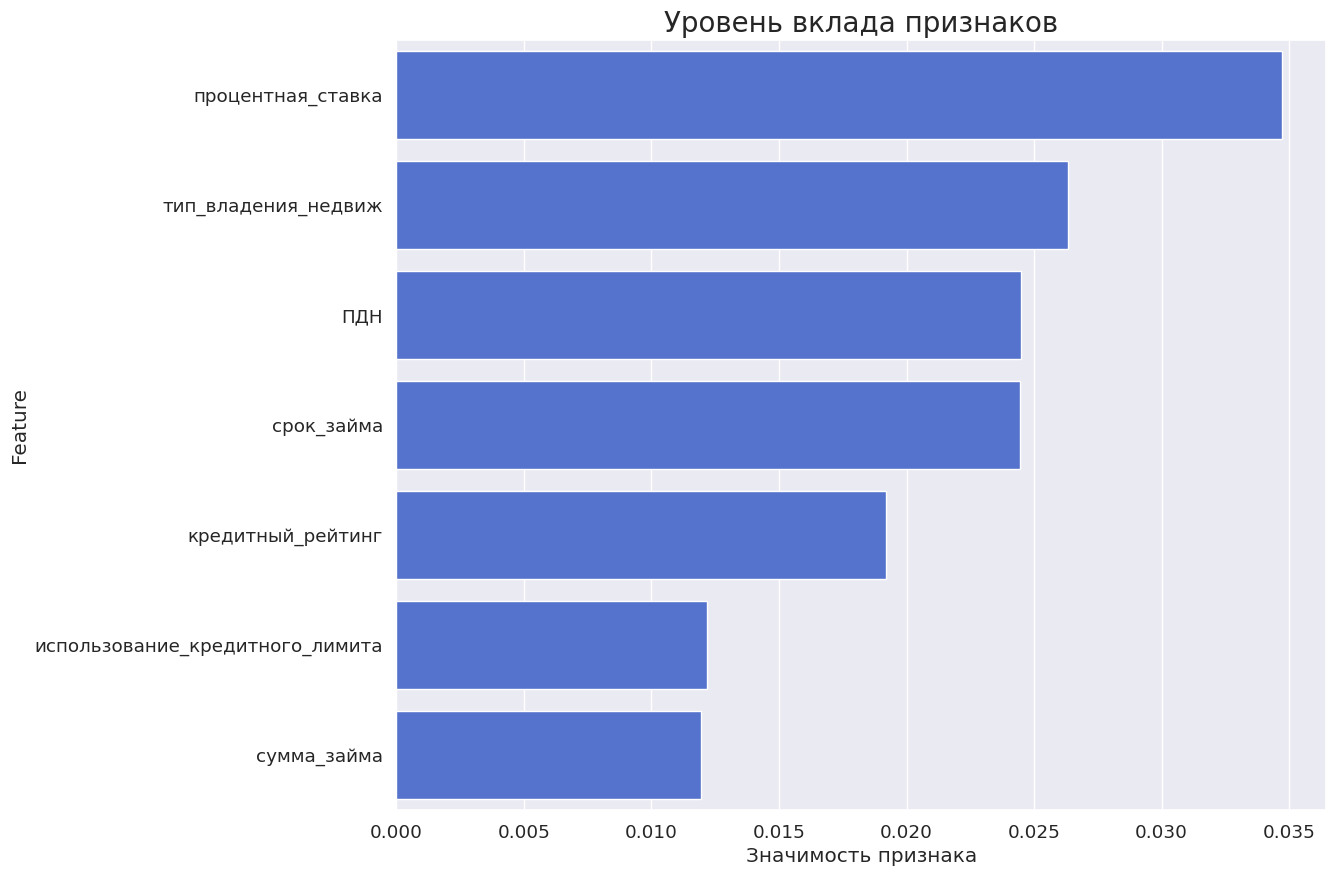

In [ ]:
drop_column_importance_plot(gbc_opt, X_train, y_train)

Каждый признак оказывает положительное влияние на прогнозирование цели, поэтому нет необходимости убирать какой-то из них

Однако изменим параметры на значения, подобранные функцией оптимизации

In [ ]:
gbc = GradientBoostingClassifier(max_features=None, loss='log_loss', criterion='friedman_mse',
                                 learning_rate=0.3, max_depth=4, n_estimators=50, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

gbc_final = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

### Оценка производительности модели градиентного спуска


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6432
           1       0.91      0.19      0.32      1568

    accuracy                           0.84      8000
   macro avg       0.87      0.59      0.61      8000
weighted avg       0.85      0.84      0.79      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1608
           1       0.45      0.09      0.15       392

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.52      2000
weighted avg       0.74      0.80      0.74      2000



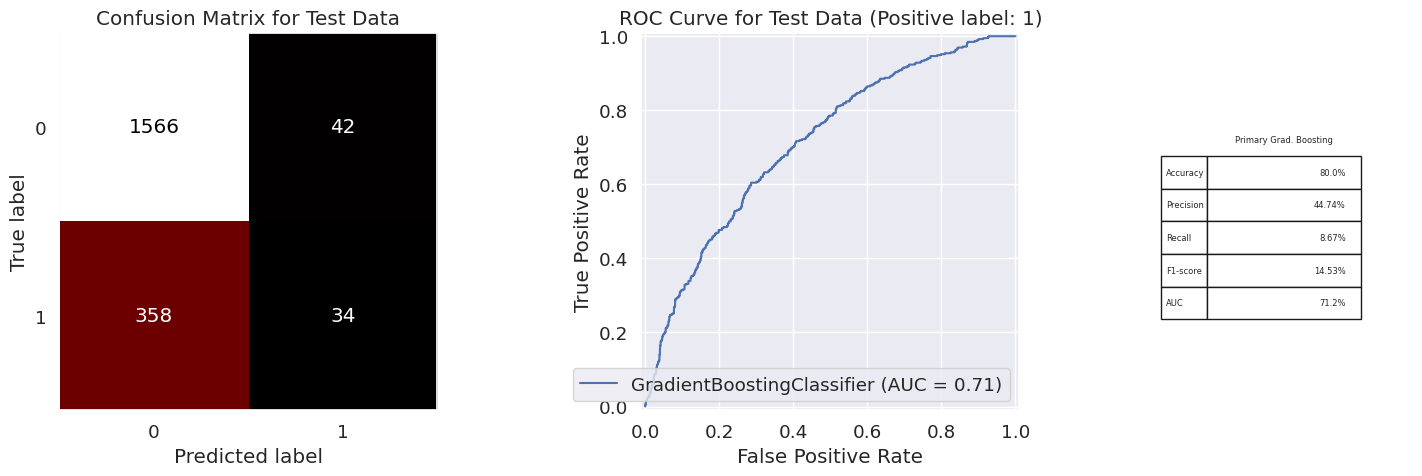

In [ ]:
model_evaluation(gbc_final, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

In [ ]:
gbc_result = metrics_calculator(gbc_final, X_test, y_test, 'Gradient Boosting')